# Data Challenge Project: Fraud Detection  

<img src="https://github.com/er1czz/kaggle/blob/master/unsplash_transaction.JPG?raw=true" align = "right" style = "border:20px solid white">   

<h3> Situation:</h3>  

 * Credit card fraud is a common financial fraud.  
 * How to maximaize the transaction security with minimal hassles to clients.  
 
<h3> Task:</h3> 
 
 * Is it possible to address this challenge by implementing high accuracy predictive models based on machine learning?      

<h3> Action:</h3>

* Develop a predicative model based on machine learning algorithms of binary classification.  

<h3> Result (expected):</h3> 

* To maximize the detection rate of fradulent activities while minimizing the number of false alarms (false positive events).    

<b>The project consists of five sections as follows:
1. Data exploration
2. Data cleaning
3. Feature selection
4. Models training and testing
5. Summary</b>

In [1]:
cd ../../../../Desktop/Fraud2/

C:\Users\EzzZ\Desktop\Fraud2


In [2]:
import pandas as pd

In [77]:
# Data, provided by Kaggle.com, contain two datasets: identity and transaction.  

id = pd.read_csv('train_identity.csv')
tn = pd.read_csv('train_transaction.csv')

## 1. Data exploration

In [4]:
print(id.shape)
print(tn.shape)

(144233, 41)
(590540, 394)


In [5]:
id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
tn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
tn.TransactionID.sum()

1938311430530

In [8]:
id.TransactionID.sum()

466785485555

Feature "TransactionDT" is timedelta from a given reference datetime (not an actual timestamp).

In [9]:
tn.isnull().sum().max()

552913

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 1.1. Remove unpaired transaction (mismatch between identity and transaction datasets)

In [11]:
data = tn.merge(id, on= 'TransactionID', copy = False)

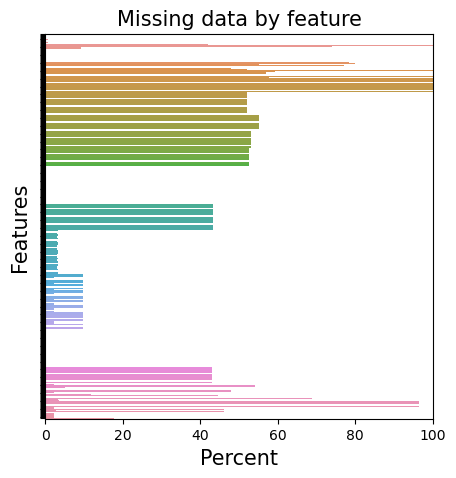

In [12]:
plt.style.use('default')
total=data.isnull().sum()
percent=data.isnull().sum()/data.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data.index,x=missing_data['percent'])
g.set(yticklabels=[])

plt.xlim(0, 100)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.title('Missing data by feature', fontsize=15)
plt.show()

In [13]:
print('id rows   %.f' %len(id))
print('tn rows   %.f'   %len(tn))
print('data rows %.f' %len(data))

id rows   144233
tn rows   590540
data rows 144233


In [14]:
tmp = id.size + tn.size - data.size - len(data)
percent = tmp/(id.size + tn.size)*100
print('unmatched data entry %.f' % tmp)
print('unmatched data       %.2f%%\n' % percent)

missing = data.isnull().sum().sum()
total = data.size
percent1 = missing/total*100
print('Missing data entry %.f' % missing)
print('Total data entry   %.f' % total)
print('Missing data:      %.2f%%\n' % percent)

tmp1 = data.isnull().any(axis = 0).sum()
print('Columns with missing values %.f' %tmp1)
print('total columns               %.f' %len(data.columns))

tmp2 = data.isnull().any(axis = 1).sum()
print('Rows with missing values %.f' %tmp2)
print('total rows               %.f' %len(data))

unmatched data entry 175844958
unmatched data       73.70%

Missing data entry 16834880
Total data entry   62597122
Missing data:      73.70%

Columns with missing values 412
total columns               434
Rows with missing values 144233
total rows               144233


# 2. Data cleaning

### Treating missing value is tricky for data pre-processing. 
- Each row has missing value. A few columns have more than 50% data of missing values. Total missing data in percentage is 26.9%.
- Features with over 90% data of missing values will be discarded. For the rest, the missing values will be replaced with mean.
- Considering the potential data leakage, the data jettison will be performed first, splitting data second, and replacing missing values last.

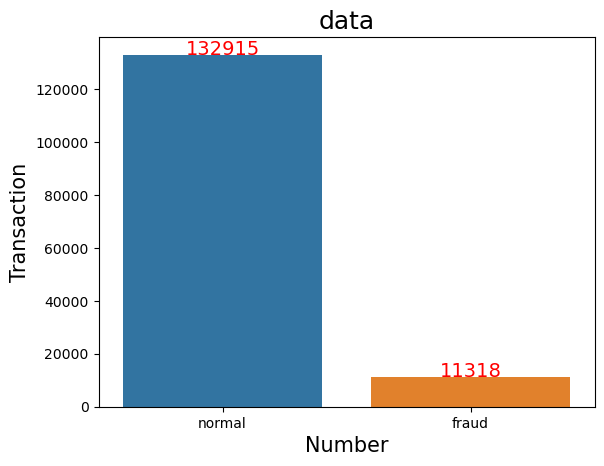

In [15]:
import numpy as np
sns.countplot(x='isFraud',data=data)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('data',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (data['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

### 2.1. Remove columns with over 90% data missing 

In [16]:
data_1 = data.dropna(axis=1, thresh=len(data)*0.1)

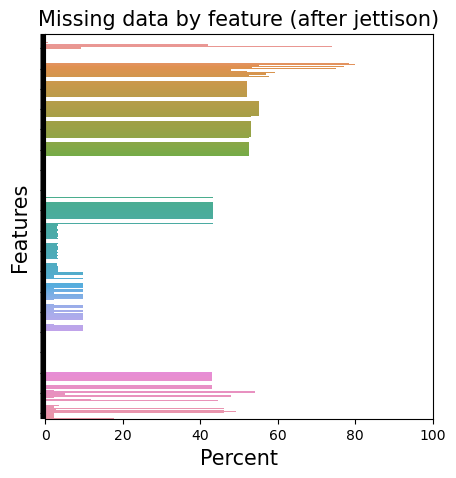

In [17]:
plt.style.use('default')
total1=data_1.isnull().sum()
percent1=data_1.isnull().sum()/data_1.isnull().count()*100
missing_data1=pd.concat([total1,percent1],axis=1, keys=['total', 'percent'])

plt.subplots(figsize=(5, 5))
g = sns.barplot(y=missing_data1.index,x=missing_data1['percent'])
g.set(yticklabels=[])

plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent', fontsize=15)
plt.xlim(0, 100)
plt.title('Missing data by feature (after jettison)', fontsize=15)
plt.show()

In [18]:
tmp = data_1.size/data.size*100
print('Data preserved: %.2f%%\n' % tmp)

Data preserved: 93.09%



### 2.2. Splitting data: 80% for training and 20% for testing

In [19]:
X = data_1.drop('isFraud', axis=1)
y = data_1['isFraud'].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [21]:
tmp = y_test.sum(axis=0)/y.sum(axis=0)*100
print('Testing data: %.1f%%\n' % tmp)

Testing data: 20.5%



In [22]:
y_train.head()

122872    0
54800     0
109241    1
5569      0
1874      0
Name: isFraud, dtype: int64

##### Manually split the dataset for the convenience of data wrangling

In [23]:
normal = data_1[data_1['isFraud'] == 0]
fraud = data_1[data_1['isFraud'] == 1]
# shuffle
normal_r = normal.sample(frac=1)
fraud_r = fraud.sample(frac=1)
# 80% for training and 20% for testing.
normal_1 = normal_r[:106332]
normal_2 = normal_r[106333:]
fraud_1 = fraud_r[:9054]
fraud_2 = fraud_r[9055:]
train = pd.concat([normal_1, fraud_1])
test = pd.concat([normal_2, fraud_2])

### Double check the data features

In [24]:
print(train.shape)
print(test.shape)

(115386, 404)
(28845, 404)


In [25]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
16073,3036162,0,1180029,500.000,H,6580,284.0,150.0,visa,100.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
109464,3397948,0,10375049,200.000,R,6019,583.0,150.0,visa,226.0,...,mobile safari generic,32.0,2436x1125,match_status:1,T,F,T,F,mobile,iOS Device
48400,3098553,0,2171359,50.000,H,16717,111.0,150.0,mastercard,224.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,T,T,mobile,iOS Device
115092,3430134,0,11276461,174.296,C,15885,545.0,185.0,visa,138.0,...,chrome 58.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
98668,3349233,0,8981001,43.744,C,15885,545.0,185.0,visa,138.0,...,ie 11.0 for desktop,NaN,NaN,NaN,F,T,T,F,desktop,rv:11.0


In [26]:
train[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
16073,visa,chrome 62.0,desktop,Windows
109464,visa,mobile safari generic,mobile,iOS Device
48400,mastercard,mobile safari 11.0,mobile,iOS Device
115092,visa,chrome 58.0,desktop,NaN
98668,visa,ie 11.0 for desktop,desktop,rv:11.0
...,...,...,...,...
107402,mastercard,mobile safari generic,mobile,NaN
67965,visa,chrome 63.0,desktop,Windows
9987,mastercard,chrome 62.0,desktop,NaN
124984,american express,firefox 59.0,desktop,rv:59.0


### 2.3. Replacing missing value with mean

In [27]:
train_m = train.fillna(train.mean())

In [28]:
train_m.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
16073,3036162,0,1180029,500.000,H,6580,284.0,150.0,visa,100.0,...,chrome 62.0,24.000000,1920x1080,match_status:2,T,F,T,T,desktop,Windows
109464,3397948,0,10375049,200.000,R,6019,583.0,150.0,visa,226.0,...,mobile safari generic,32.000000,2436x1125,match_status:1,T,F,T,F,mobile,iOS Device
48400,3098553,0,2171359,50.000,H,16717,111.0,150.0,mastercard,224.0,...,mobile safari 11.0,32.000000,1334x750,match_status:1,T,F,T,T,mobile,iOS Device
115092,3430134,0,11276461,174.296,C,15885,545.0,185.0,visa,138.0,...,chrome 58.0,26.511599,NaN,NaN,F,F,T,F,desktop,NaN
98668,3349233,0,8981001,43.744,C,15885,545.0,185.0,visa,138.0,...,ie 11.0 for desktop,26.511599,NaN,NaN,F,T,T,F,desktop,rv:11.0


In [29]:
test_m = test.fillna(test.mean())

## 3. Feature Selection

### 3.1. Use encoder: non-numerical value --- > numberical value

In [30]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [31]:
for f in train_m.columns:
    if train_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(train_m[f].values))
        train_m[f] = le.transform(list(train_m[f].values))

In [32]:
train_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
16073,4,40,0,1505
109464,4,97,1,1628
48400,2,94,1,1628
115092,4,32,0,1643
98668,4,87,0,1645
...,...,...,...,...
107402,2,97,1,1643
67965,4,43,0,1505
9987,2,40,0,1643
124984,0,78,0,1673


In [33]:
test[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
99866,visa,firefox 52.0,desktop,Windows
57792,visa,safari generic,desktop,MacOS
129252,mastercard,chrome 65.0,mobile,NaN
102156,visa,safari generic,desktop,MacOS
81669,visa,safari generic,desktop,MacOS
...,...,...,...,...
69082,visa,mobile safari 11.0,mobile,NaN
141460,visa,chrome 66.0 for android,mobile,Blade A510 Build/MRA58K
72178,mastercard,chrome 63.0 for android,mobile,SM-A510M Build/MMB29K
111179,visa,chrome 65.0 for android,mobile,Hisense L675 Build/MRA58K


In [34]:
for f in test_m.columns:
    if test_m[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(test_m[f].values))
        test_m[f] = le.transform(list(test_m[f].values))

In [35]:
test_m[['card4','id_31','DeviceType','DeviceInfo']]

,card4,id_31,DeviceType,DeviceInfo
99866,4,66,0,978
57792,4,102,0,405
129252,2,47,1,1056
102156,4,102,0,405
81669,4,102,0,405
...,...,...,...,...
69082,4,84,1,1056
141460,4,51,1,93
72178,2,42,1,690
111179,4,48,1,225


### 3.2. Correlation

In [36]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
16073,3036162,0,1180029,500.000,H,6580,284.0,150.0,visa,100.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
109464,3397948,0,10375049,200.000,R,6019,583.0,150.0,visa,226.0,...,mobile safari generic,32.0,2436x1125,match_status:1,T,F,T,F,mobile,iOS Device
48400,3098553,0,2171359,50.000,H,16717,111.0,150.0,mastercard,224.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,T,T,mobile,iOS Device
115092,3430134,0,11276461,174.296,C,15885,545.0,185.0,visa,138.0,...,chrome 58.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
98668,3349233,0,8981001,43.744,C,15885,545.0,185.0,visa,138.0,...,ie 11.0 for desktop,NaN,NaN,NaN,F,T,T,F,desktop,rv:11.0


In [37]:
train_c = train.set_index('TransactionID')

In [38]:
print(train_c.shape)

(115386, 403)


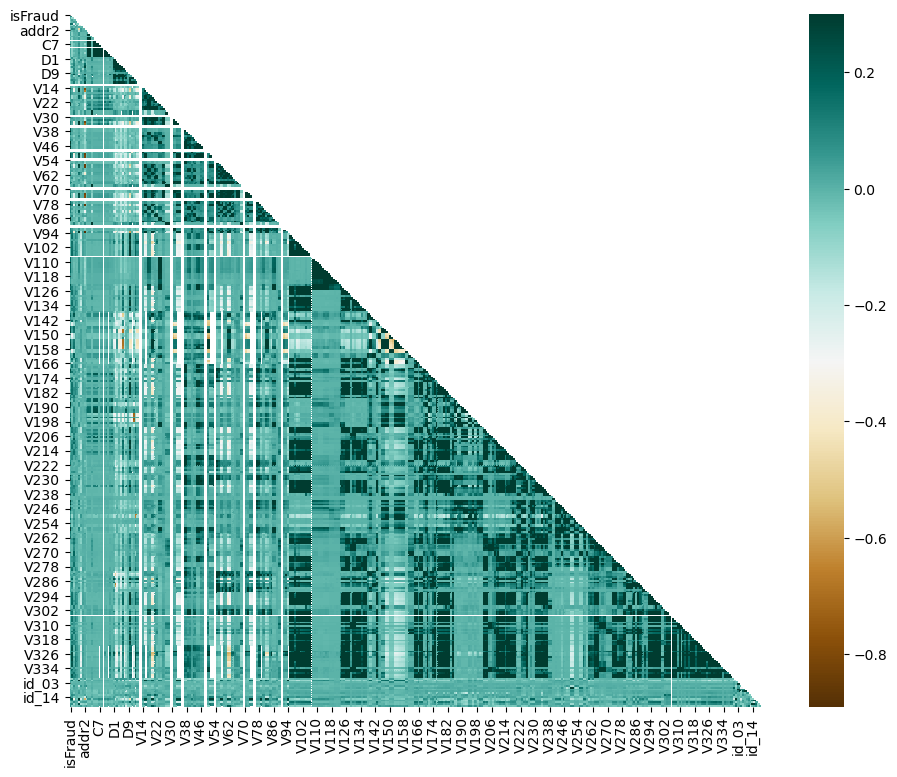

In [39]:
correlation_matrix = train_c.corr()
plt.figure(figsize=(12,9))
matrix = np.triu(train_c.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=.3, square=True, cmap= 'BrBG')

- There is no feature exhibiting noticeable correlation with "isFraud".  
- Feature category C and V series show noticeable intercorrelations.

### 3.3. Feature Importance (Random Forest)

In [40]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
X = train.drop('isFraud', axis=1)
y = train['isFraud'].copy()

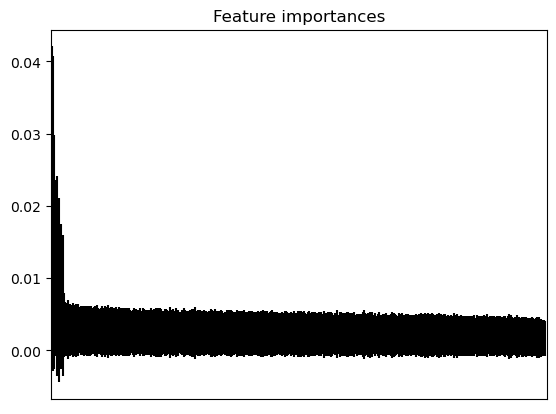

In [42]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=404, n_informative=5, n_redundant=5, random_state=13)
# define the model
forest = ExtraTreesClassifier(n_estimators=250, random_state=13)
# fit the model
forest.fit(X, y)
# get importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks([])
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
feature = [ ]
# summarize feature importance
for i,v in enumerate(importances):
    if v >= 0.0021:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)

Feature: 0, Score: 0.00219
Feature: 2, Score: 0.00241
Feature: 4, Score: 0.00235
Feature: 5, Score: 0.00233
Feature: 7, Score: 0.00218
Feature: 8, Score: 0.00214
Feature: 10, Score: 0.00268
Feature: 11, Score: 0.00259
Feature: 12, Score: 0.00248
Feature: 13, Score: 0.00211
Feature: 14, Score: 0.00227
Feature: 15, Score: 0.00264
Feature: 16, Score: 0.00229
Feature: 18, Score: 0.00227
Feature: 19, Score: 0.00227
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00242
Feature: 24, Score: 0.00226
Feature: 25, Score: 0.00262
Feature: 27, Score: 0.00216
Feature: 30, Score: 0.00211
Feature: 31, Score: 0.00233
Feature: 33, Score: 0.00252
Feature: 34, Score: 0.00240
Feature: 35, Score: 0.00269
Feature: 36, Score: 0.00229
Feature: 37, Score: 0.00257
Feature: 38, Score: 0.00226
Feature: 40, Score: 0.00243
Feature: 41, Score: 0.00228
Feature: 42, Score: 0.00236
Feature: 43, Score: 0.00214
Feature: 44, Score: 0.00259
Feature: 45, Score: 0.00233
Feature: 46, Score: 0.00216
Feature: 48, Score: 0.0021

In [44]:
print(feature)

[0, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 27, 30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 65, 66, 68, 70, 71, 73, 74, 75, 77, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148, 150, 151, 152, 154, 156, 157, 159, 160, 165, 167, 170, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 190, 192, 193, 194, 195, 197, 198, 199, 200, 201, 204, 205, 206, 207, 208, 209, 210, 212, 213, 215, 216, 219, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 262, 263, 264, 265, 267, 268, 269, 270, 271, 272, 275, 277, 279, 282, 284, 286, 287, 288, 290, 291, 293, 294, 295, 

In [45]:
len(feature)

292

### 3.3. Data balancing (undersample)

#### The training dataset is highly skewed. 
- The fraction of fradulent transactions is a minority, compared to that of normal ones. 
- Thus, accurate correlations between the fraudulent transactions and their corresponding features can be challenging. 
- To overcome this issue, undersampling the majority (normal) is performed which can help to balance the dataset and to improve the computation efficiency.

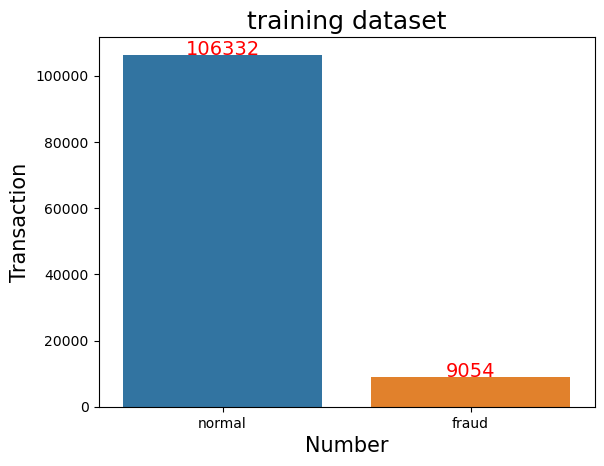

In [46]:
sns.countplot(x='isFraud',data=train_m)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_m['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

In [47]:
normal_m = train_m[train_m['isFraud'] == 0]
fraud_m = train_m[train_m['isFraud'] == 1]

normal_mr = normal_m.sample(frac=1) 
normal_u = normal_mr[:9054]
train_u = pd.concat([normal_u, fraud_m])

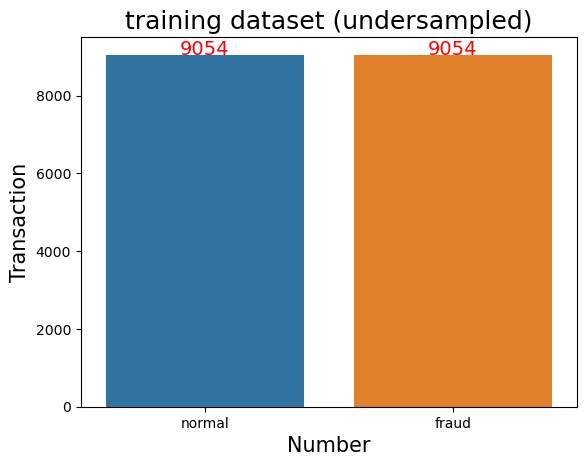

In [48]:
sns.countplot(x='isFraud',data=train_u)
plt.xticks( np.arange(2), ['normal', 'fraud'] )
plt.title('training dataset (undersampled)',fontsize= 18)
plt.xlabel('Number',fontsize = 15)
plt.ylabel('Transaction',fontsize = 15)
labels = (train_u['isFraud'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v, str(v), ha = 'center', size = 14, color = 'r')
plt.show()

## 4. Model training and testing

In [49]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn import metrics

In [50]:
X_train = train_u.iloc[:,feature]
y_train = train_u['isFraud'].copy()
X_test = test_m.iloc[:,feature]
y_test = test_m['isFraud'].copy()

In [51]:
# Logistic
LR = LogisticRegression(C=1e5)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [52]:
# XGBoost
XG = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=13,
    tree_method='hist')
XG.fit(X_train, y_train)
XG_pred = XG.predict(X_test)

In [53]:
# Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=8)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

#### F<sub>1</sub> score

In [55]:
score1 = metrics.f1_score(y_test, LR_pred)
score2 = metrics.f1_score(y_test, XG_pred)
score3 = metrics.f1_score(y_test, RF_pred)
score4 = metrics.f1_score(y_test, LG_pred)
print ('F1 score Logistic:     %.5f' % score1 )
print ('F1 score XGboost:      %.5f' % score2 )
print ('F1 score RandomForest: %.5f' % score3 )
print ('F1 score LightGBM:     %.5f' % score4 )

F1 score Logistic:     0.18326
F1 score XGboost:      0.67804
F1 score RandomForest: 0.44065
F1 score LightGBM:     0.57731


#### Confusion matrix

In [56]:
cm1 = metrics.confusion_matrix(y_test, LR_pred)
cm2 = metrics.confusion_matrix(y_test, XG_pred)
cm3 = metrics.confusion_matrix(y_test, RF_pred)
cm4 = metrics.confusion_matrix(y_test, LG_pred)

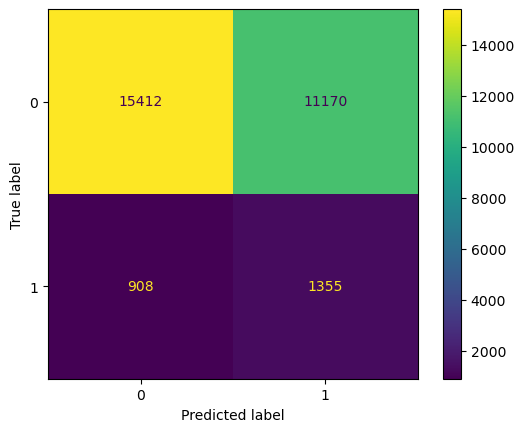

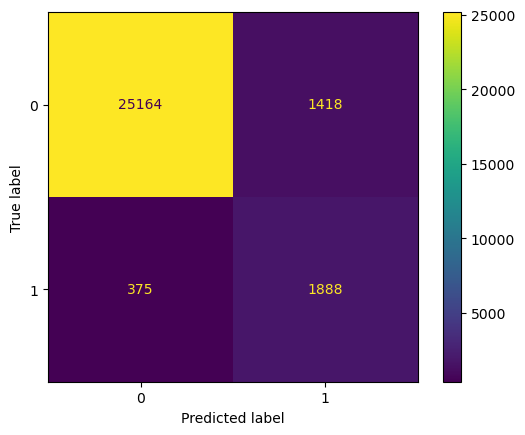

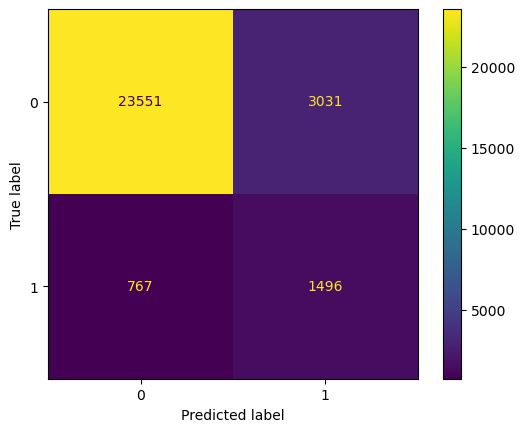

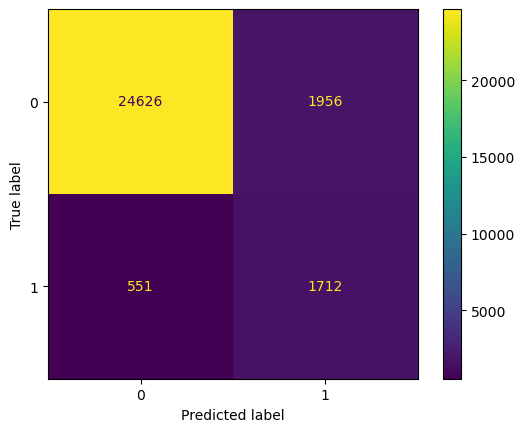

In [57]:
cm1_display = metrics.ConfusionMatrixDisplay(cm1).plot()
cm2_display = metrics.ConfusionMatrixDisplay(cm2).plot()
cm3_display = metrics.ConfusionMatrixDisplay(cm3).plot()
cm4_display = metrics.ConfusionMatrixDisplay(cm4).plot()

#### Precision-Recall Area Under Curve 

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [70]:
naive_probs = LR_pred[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

IndexError: too many indices for array

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.10')

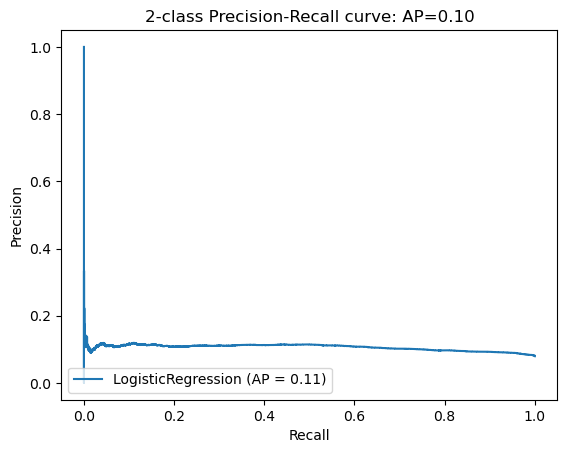

In [67]:
average_precision = average_precision_score(y_test, LR_pred)
disp = plot_precision_recall_curve(LR, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.49')

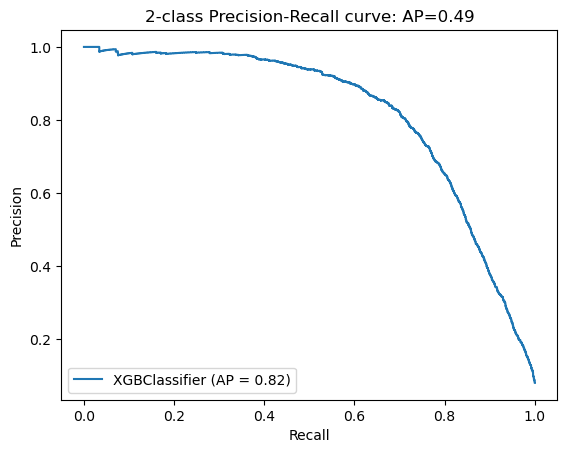

In [68]:
average_precision = average_precision_score(y_test, XG_pred)
disp = plot_precision_recall_curve(XG, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.25')

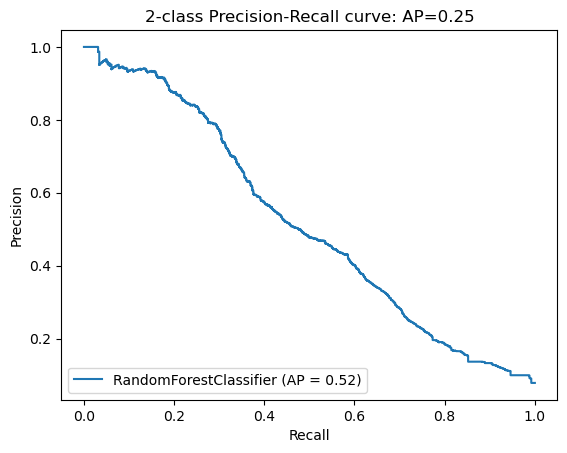

In [69]:
average_precision = average_precision_score(y_test, RF_pred)
disp = plot_precision_recall_curve(RF, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.37')

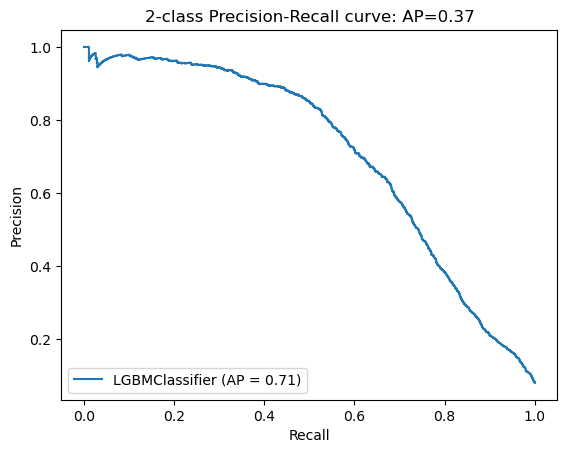

In [66]:
average_precision = average_precision_score(y_test, LG_pred)
disp = plot_precision_recall_curve(LG, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### Learning curve for XGBoost

In [73]:
from sklearn.model_selection import learning_curve

In [74]:
train_sizes, train_scores, test_scores = learning_curve(xgb.XGBClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='f1',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

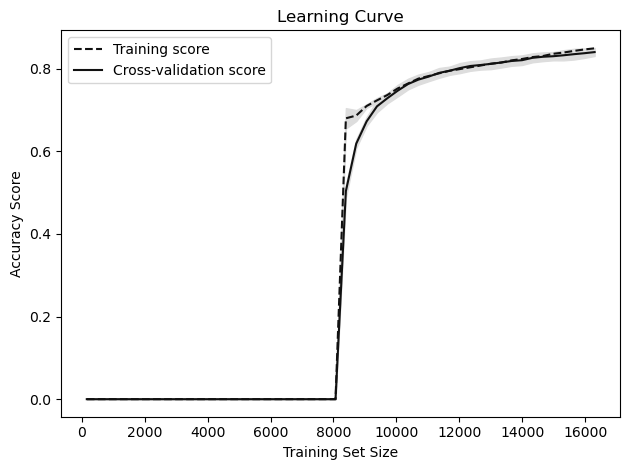

In [75]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 5. Summary  
This project aimed to tackle the data challenge in fraud detection. The original data contain information of transaction and identification. Notably, the data are heavily skewed: 96.5% of transactions is non-fradulent. In addition, the dataset contain missing values and categorical features. To overcome these challenges, undersampling was performed to balance the data; features with missing data were either discarded or replaced by means; all the non-numberical features were systematically transformed into numberical by encoder. To validate model predictivity, original dataset was randomlly splited into two groups: 80% for training and 20% for testing. 

- Four classification models based on Logistic, XGboost, Random Forest, and LightGBM algorithms. 
- F<sub>1</sub> scores of 0.19, 0.65, 0.44, and 0.57 respectively.
- Machine learning models have potential to provide high accuracy fraud detection, especially by using the XGboost algorithm.

### Future tasks
1. Feature engineering and selection: Reduce data redundancy and improve the data quality.
2. Model optimization: Hyperparameters in XGBoost and L1 L2 regularization for Logistic regression.
3. Others: data normalization (scaler), learning curve, etc.

### References  
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html  
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://www.kaggle.com/pavansanagapati/anomaly-detection-credit-card-fraud-analysis  
https://www.kaggle.com/shahules/tackling-class-imbalance  
https://scikit-learn.org/   
https://en.wikipedia.org/wiki/F1_score

Image source  
https://images.unsplash.com/photo-1563013544-824ae1b704d3